In [1]:
# Dependency imports
import re
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()
'''
sns.set_style({'axes.facecolor':'#E7E7F0', 'figure.facecolor':'white', \
               'axes.edgecolor': 'white', 'grid.color': 'white', \
              'axes.labelcolor': 'black', 'text.color': 'black', \
              'xtick.color': 'black', 'ytick.color': 'black'})
'''

# plotly standard imports
import plotly
plotly.tools.set_credentials_file(username='vivek.pandey', api_key='GcINHnvXXRBgEUUckTTf')

import plotly.graph_objs as go
import plotly.plotly as py
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

# Cufflinks wrapper on plotly
import cufflinks

# Notebook customizations
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_colwidth = -1
import warnings
warnings.filterwarnings('ignore')

sns.axes_style()

{'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': 'white',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'patch.force_edgecolor': True,
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

### Properties EDA

In [2]:
properties_df = pd.read_csv("./output/engineered_trulia_properties.csv", sep="|", dtype={'zip_code': str}, encoding="latin1")
properties_df

,address,area_sqft,basement_type,built_year,city,exterior_type,heating_type,lot_size,no_of_baths,no_of_bedrooms,no_of_parking_spaces,no_of_stories,parking_type,property_type,property_url,state,tax_amount,tax_year,zip_code
0,160 162 Old Peckslip Rd,1352.0,NaN,1985,Holmes,NaN,NaN,32234.4,3.0,3.0,NaN,NaN,NaN,Multi-Family,https://www.trulia.com/p/ny/holmes/160-162-old-peckslip-rd-holmes-ny-12531--2349467107,NY,7718.79,0,12531
1,10 Cliff Ct,1184.0,NaN,1997,Holmes,NaN,NaN,60984.0,2.5,3.0,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ny/holmes/10-cliff-ct-holmes-ny-12531--2305202587,NY,8320.40,2017,12531
2,26 Donovan Ln,1890.0,NaN,1992,Holmes,NaN,NaN,110206.8,2.5,3.0,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ny/holmes/26-donovan-ln-holmes-ny-12531--2349447123,NY,9260.24,2017,12531
3,3130 Grand Concourse #7R,103883.0,NaN,1955,Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3130-grand-concourse-7r-bronx-ny-10458--2171936520,NY,NaN,2017,10468
4,3130 Grand Concourse #7S,103883.0,NaN,1955,Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3130-grand-concourse-7s-bronx-ny-10458--2333495270,NY,NaN,2017,10458
5,3130 Grand Concourse #7P,103883.0,NaN,1955,Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3130-grand-concourse-7p-bronx-ny-10458--2173798637,NY,NaN,2017,10458
6,3130 Grand Concourse #7N,103883.0,NaN,1955,Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3130-grand-concourse-7n-bronx-ny-10458--2345496753,NY,NaN,2017,10458
7,3184 Grand Concourse #4E,80811.0,NaN,1965,Bronx,NaN,NaN,16552.8,NaN,NaN,NaN,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3184-grand-concourse-4e-bronx-ny-10458--2345502809,NY,NaN,2017,10458
8,4 Wheel Dr,NaN,NaN,0,Craryville,NaN,NaN,174240.0,NaN,NaN,NaN,NaN,NaN,Lot/Land,https://www.trulia.com/p/ny/craryville/4-wheel-dr-craryville-ny-12521--2204807965,NY,1509.69,2017,12521
9,Winding Ln,NaN,NaN,0,Craryville,NaN,NaN,7405.0,NaN,NaN,NaN,NaN,NaN,Lot/Land,https://www.trulia.com/p/ny/craryville/winding-ln-craryville-ny-12521--2158446526,NY,31.29,2017,12521


In [3]:
# Dropping columns that do not have any value for now
properties_df.drop(axis=0, inplace=True, columns=['basement_type', 'exterior_type', 'heating_type', \
                                                  'no_of_parking_spaces', 'no_of_stories', 'parking_type'])
properties_df

,address,area_sqft,built_year,city,lot_size,no_of_baths,no_of_bedrooms,property_type,property_url,state,tax_amount,tax_year,zip_code
0,160 162 Old Peckslip Rd,1352.0,1985,Holmes,32234.4,3.0,3.0,Multi-Family,https://www.trulia.com/p/ny/holmes/160-162-old-peckslip-rd-holmes-ny-12531--2349467107,NY,7718.79,0,12531
1,10 Cliff Ct,1184.0,1997,Holmes,60984.0,2.5,3.0,Single-Family Home,https://www.trulia.com/p/ny/holmes/10-cliff-ct-holmes-ny-12531--2305202587,NY,8320.40,2017,12531
2,26 Donovan Ln,1890.0,1992,Holmes,110206.8,2.5,3.0,Single-Family Home,https://www.trulia.com/p/ny/holmes/26-donovan-ln-holmes-ny-12531--2349447123,NY,9260.24,2017,12531
3,3130 Grand Concourse #7R,103883.0,1955,Bronx,NaN,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3130-grand-concourse-7r-bronx-ny-10458--2171936520,NY,NaN,2017,10468
4,3130 Grand Concourse #7S,103883.0,1955,Bronx,NaN,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3130-grand-concourse-7s-bronx-ny-10458--2333495270,NY,NaN,2017,10458
5,3130 Grand Concourse #7P,103883.0,1955,Bronx,NaN,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3130-grand-concourse-7p-bronx-ny-10458--2173798637,NY,NaN,2017,10458
6,3130 Grand Concourse #7N,103883.0,1955,Bronx,NaN,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3130-grand-concourse-7n-bronx-ny-10458--2345496753,NY,NaN,2017,10458
7,3184 Grand Concourse #4E,80811.0,1965,Bronx,16552.8,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3184-grand-concourse-4e-bronx-ny-10458--2345502809,NY,NaN,2017,10458
8,4 Wheel Dr,NaN,0,Craryville,174240.0,NaN,NaN,Lot/Land,https://www.trulia.com/p/ny/craryville/4-wheel-dr-craryville-ny-12521--2204807965,NY,1509.69,2017,12521
9,Winding Ln,NaN,0,Craryville,7405.0,NaN,NaN,Lot/Land,https://www.trulia.com/p/ny/craryville/winding-ln-craryville-ny-12521--2158446526,NY,31.29,2017,12521


In [4]:
properties_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704001 entries, 0 to 704000
Data columns (total 13 columns):
address           704001 non-null object
area_sqft         548310 non-null float64
built_year        704001 non-null int64
city              703970 non-null object
lot_size          678075 non-null float64
no_of_baths       421586 non-null float64
no_of_bedrooms    409810 non-null float64
property_type     704001 non-null object
property_url      704001 non-null object
state             703973 non-null object
tax_amount        509535 non-null float64
tax_year          704001 non-null int64
zip_code          703973 non-null object
dtypes: float64(5), int64(2), object(6)
memory usage: 69.8+ MB


### Analyze and fill missing data

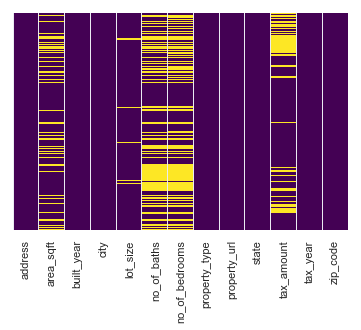

In [5]:
sns.heatmap(properties_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

The baths and beds columns are essential, lets see why they are incomplete

In [6]:
properties_df[properties_df['no_of_bedrooms'].isnull() | properties_df['no_of_baths'].isnull() | \
              (properties_df['no_of_bedrooms'] == 0) | (properties_df['no_of_baths'] == 0) | \
              (properties_df['built_year'] < 1500) | (properties_df['tax_year'] < 1800) | \
                properties_df['area_sqft'].isnull() | (properties_df['area_sqft'] < 100) | \
              properties_df['lot_size'].isnull() | (properties_df['lot_size'] < 100)]


,address,area_sqft,built_year,city,lot_size,no_of_baths,no_of_bedrooms,property_type,property_url,state,tax_amount,tax_year,zip_code
0,160 162 Old Peckslip Rd,1352.0,1985,Holmes,32234.4,3.0,3.0,Multi-Family,https://www.trulia.com/p/ny/holmes/160-162-old-peckslip-rd-holmes-ny-12531--2349467107,NY,7718.79,0,12531
3,3130 Grand Concourse #7R,103883.0,1955,Bronx,NaN,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3130-grand-concourse-7r-bronx-ny-10458--2171936520,NY,NaN,2017,10468
4,3130 Grand Concourse #7S,103883.0,1955,Bronx,NaN,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3130-grand-concourse-7s-bronx-ny-10458--2333495270,NY,NaN,2017,10458
5,3130 Grand Concourse #7P,103883.0,1955,Bronx,NaN,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3130-grand-concourse-7p-bronx-ny-10458--2173798637,NY,NaN,2017,10458
6,3130 Grand Concourse #7N,103883.0,1955,Bronx,NaN,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3130-grand-concourse-7n-bronx-ny-10458--2345496753,NY,NaN,2017,10458
7,3184 Grand Concourse #4E,80811.0,1965,Bronx,16552.8,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3184-grand-concourse-4e-bronx-ny-10458--2345502809,NY,NaN,2017,10458
8,4 Wheel Dr,NaN,0,Craryville,174240.0,NaN,NaN,Lot/Land,https://www.trulia.com/p/ny/craryville/4-wheel-dr-craryville-ny-12521--2204807965,NY,1509.69,2017,12521
9,Winding Ln,NaN,0,Craryville,7405.0,NaN,NaN,Lot/Land,https://www.trulia.com/p/ny/craryville/winding-ln-craryville-ny-12521--2158446526,NY,31.29,2017,12521
10,Winding Ln,NaN,0,Craryville,7405.0,NaN,NaN,Lot/Land,https://www.trulia.com/p/ny/craryville/winding-ln-craryville-ny-12521--2158446529,NY,182.36,2017,12521
11,10 Wang Dr,960.0,1970,Craryville,23958.0,1.0,3.0,Single-Family Home,https://www.trulia.com/p/ny/craryville/10-wang-dr-craryville-ny-12521--2011547166,NY,3186.94,0,12521


Lets look at the distribution of data in the columns to see come up with close values for imputation

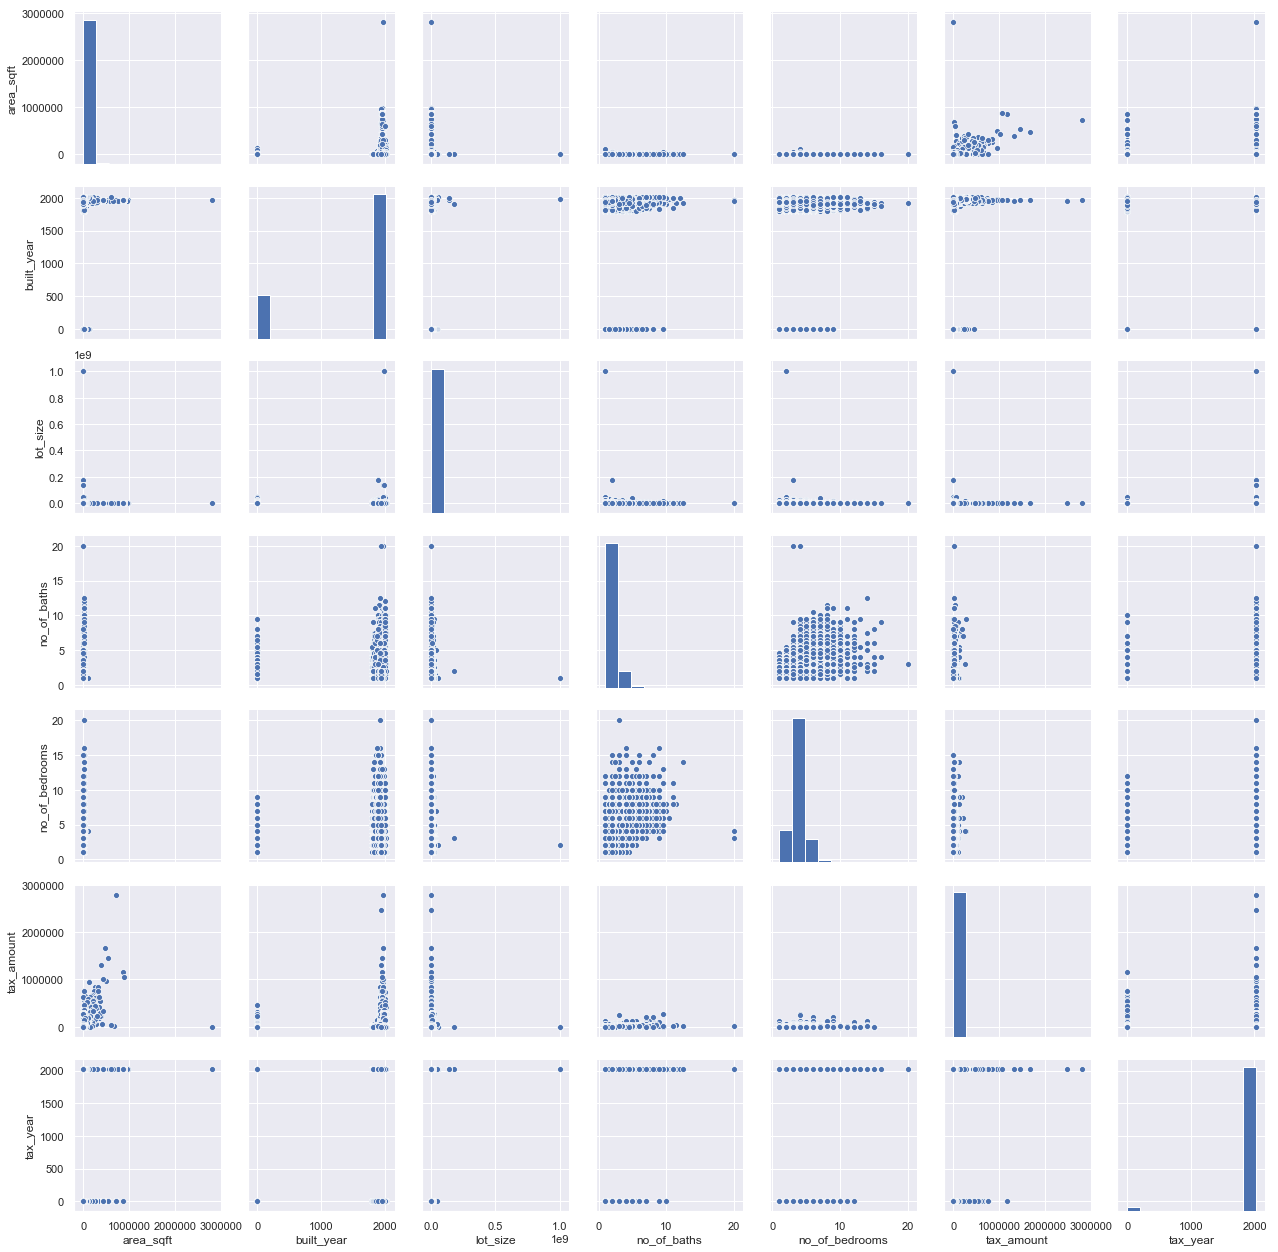

In [7]:
sns.pairplot(data=properties_df[['area_sqft', 'built_year', 'lot_size', 'no_of_baths', 'no_of_bedrooms', \
                                 'tax_amount', 'tax_year']])

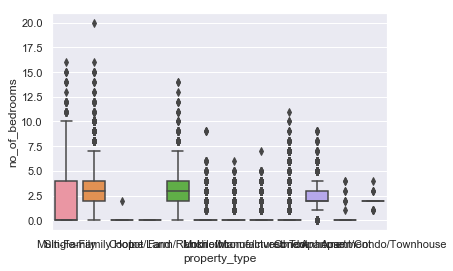

In [8]:
properties_df['no_of_bedrooms'].fillna(value=0, inplace=True)
sns.boxplot(data=properties_df, x='property_type', y='no_of_bedrooms')

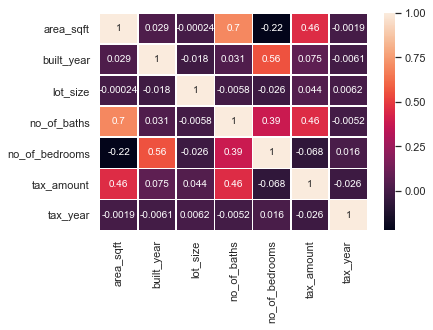

In [9]:
sns.heatmap(data=properties_df.corr(), linewidths=0.5, annot=True)

### High and medium correlated features from Properties

* area_sqft vs. no_of_baths (0.7)
* area_sqft vs. no_of_bedrooms (0.55)
* no_of_bedrooms vs no_of_baths (0.48)
* no_of_baths vs. tax_amount (0.46)
* area_sqft vs. tax_amount (0.46)

### Plotting in US Map

In [10]:
# Making a new column with a default value of one, so its value can be
# passed to the map
properties_df_for_map = properties_df
properties_df_for_map['z'] = 1

properties_map_data = dict(type='choropleth',
            colorscale = 'YlOrRd',
            locations = properties_df_for_map['state'],
            z = properties_df_for_map['z'],
            locationmode = 'USA-states',
            text = properties_df_for_map['state'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Properties in US"}
            ) 

In [11]:
properties_map_layout = dict(title = 'US Properties by State',
                              geo = dict(scope='usa',
                                         showlakes = True,
                                         lakecolor = 'rgb(85,173,240)')
                             )

In [12]:
properties_choromap = go.Figure(data=[properties_map_data], layout=properties_map_layout)

In [13]:
'''
DO NOT UNCOMMENT, THE NOTEBOOK WILL FREEZE AND CRASH WHILE RENDERING THIS MAP
iplot(properties_choromap)
'''

'\nDO NOT UNCOMMENT, THE NOTEBOOK WILL FREEZE AND CRASH WHILE RENDERING THIS MAP\niplot(properties_choromap)\n'

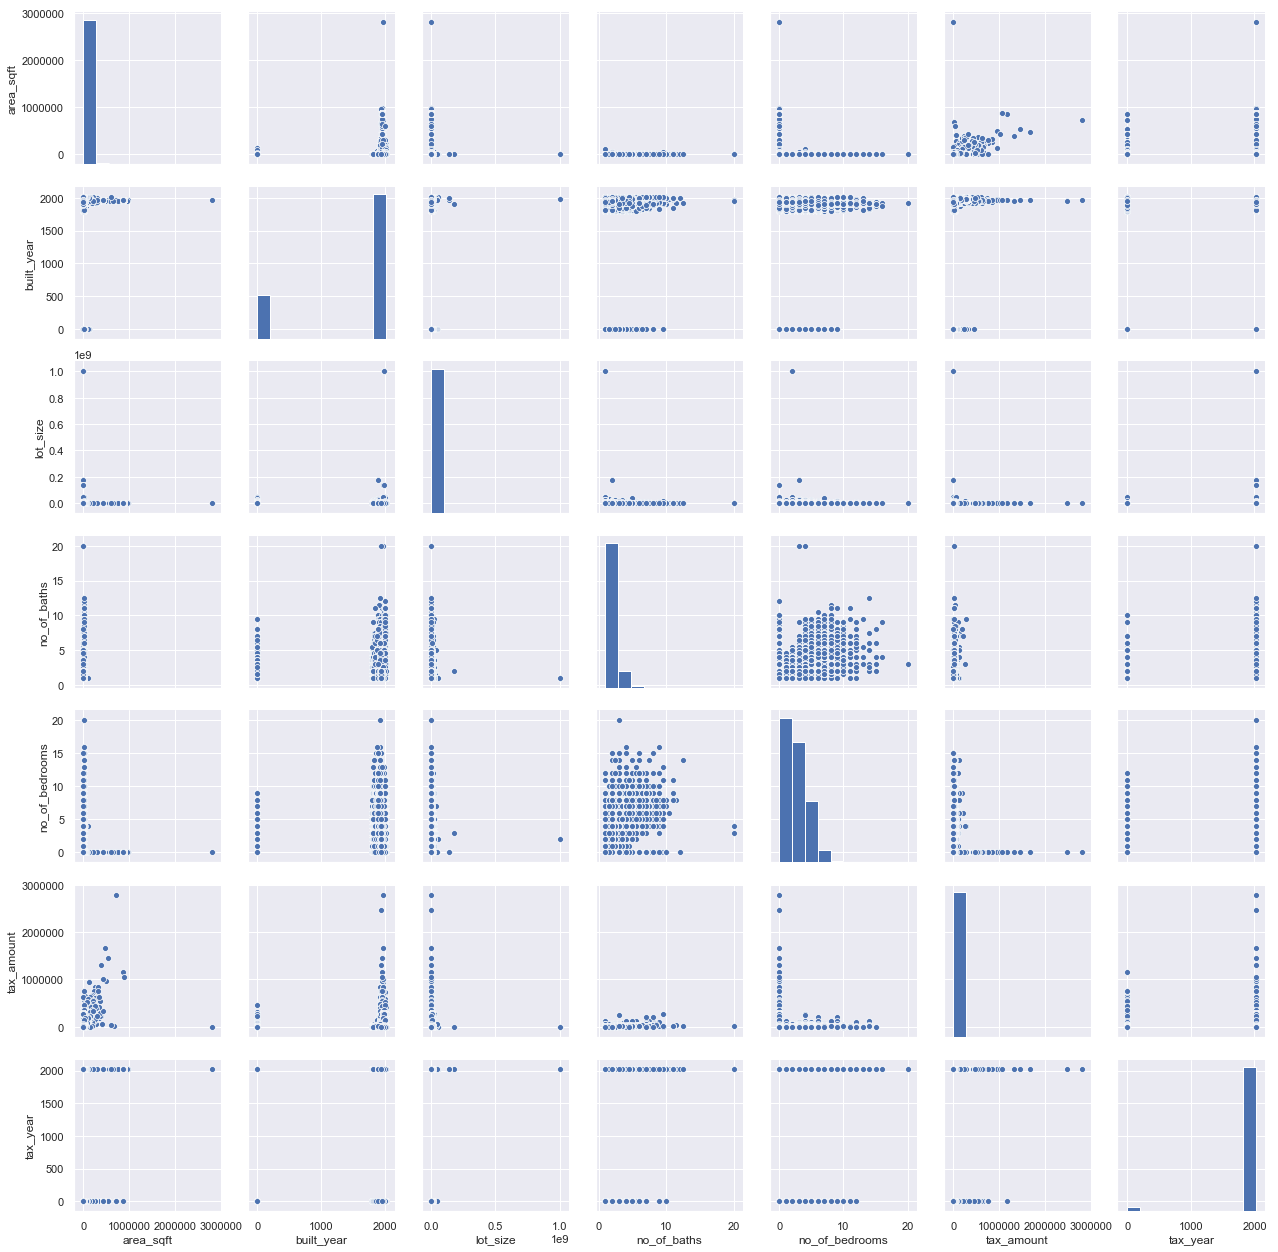

In [14]:
sns.pairplot(data=properties_df[['area_sqft', 'built_year', 'lot_size', 'no_of_baths', 'no_of_bedrooms', \
                                 'tax_amount', 'tax_year']])

### Transactions EDA

In [15]:
transactions_df = pd.read_csv("./output/engineered_trulia_transactions.csv", sep="|", parse_dates=['recording_date', 'contract_date'], \
                              encoding="latin1")
transactions_df

,contract_date,county_transfer_tax,document_type,price,property_url,recording_date,total_transfer_tax,transaction_type
0,1995-11-17,NaN,Deed,146796.0,https://www.trulia.com/p/ny/holmes/160-162-old-peckslip-rd-holmes-ny-12531--2349467107,1995-12-12,NaN,Purchase/Resale Arm's Length Residential Transaction
1,2001-06-25,NaN,Deed,224000.0,https://www.trulia.com/p/ny/holmes/10-cliff-ct-holmes-ny-12531--2305202587,2001-07-30,NaN,Purchase/Resale Arm's Length Residential Transaction
2,2013-09-19,NaN,Deed,70000.0,https://www.trulia.com/p/ny/craryville/4-wheel-dr-craryville-ny-12521--2204807965,2013-09-19,NaN,Insured Non-Residential Grant Deed
3,2006-12-28,NaN,Deed,42500.0,https://www.trulia.com/p/ny/craryville/4-wheel-dr-craryville-ny-12521--2204807965,2007-01-03,NaN,Insured Non-Residential Grant Deed
4,2018-11-08,NaN,Deed,325000.0,https://www.trulia.com/p/ny/craryville/10-wang-dr-craryville-ny-12521--2011547166,2018-11-27,NaN,Purchase/Resale Arm's Length Residential Transaction
5,2016-08-12,NaN,Deed,122000.0,https://www.trulia.com/p/ny/craryville/10-wang-dr-craryville-ny-12521--2011547166,2016-08-15,NaN,Purchase/Resale Arm's Length Residential Transaction
6,2004-07-21,NaN,Deed,130000.0,https://www.trulia.com/p/ny/craryville/10-wang-dr-craryville-ny-12521--2011547166,2004-07-21,NaN,Purchase/Resale Arm's Length Residential Transaction
7,1998-08-27,NaN,Deed,385000.0,https://www.trulia.com/p/ny/craryville/126-taghkanic-churchtown-rd-craryville-ny-12521--2349607986,1998-08-28,NaN,Non-Arm's Length Transaction
8,2009-04-17,NaN,Deed,437500.0,https://www.trulia.com/p/ny/craryville/110-taghkanic-churchtown-rd-craryville-ny-12521--2011547172,2009-04-17,NaN,Purchase/Resale Arm's Length Residential Transaction
9,2004-03-08,NaN,Deed,363750.0,https://www.trulia.com/p/ny/craryville/110-taghkanic-churchtown-rd-craryville-ny-12521--2011547172,2004-03-09,NaN,Insured Non-Residential Grant Deed


In [16]:
transactions_df.describe()

,county_transfer_tax,price,total_transfer_tax
count,82645.000000,5.218600e+05,170159.000000
mean,587.678819,2.591695e+05,2217.799288
std,921.399786,2.270036e+06,4568.770271
min,1.000000,1.000000e+00,0.000000
25%,238.000000,5.500000e+04,682.000000
50%,454.000000,1.270000e+05,1220.000000
75%,725.000000,2.950000e+05,2112.000000
max,76126.000000,1.350009e+09,98000.000000


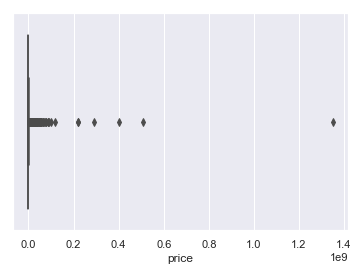

In [17]:
sns.boxplot(data=transactions_df, x='price')

In [18]:
transactions_df[transactions_df['price'] > 20000000]

,contract_date,county_transfer_tax,document_type,price,property_url,recording_date,total_transfer_tax,transaction_type
6976,2017-04-24,NaN,REO Repossession,29730100.0,https://www.trulia.com/p/ny/new-rochelle/131-franklin-ave-new-rochelle-ny-10805--2009253515,2017-05-01,1190.0,Insured Non-Residential Grant Deed
7603,2014-12-30,NaN,Bargain and Sale Deed,22500000.0,https://www.trulia.com/p/ny/new-rochelle/60-union-ave-new-rochelle-ny-10801--2009242999,2015-01-08,90000.0,Insured Non-Residential Grant Deed
7604,1998-04-20,NaN,Deed,21050000.0,https://www.trulia.com/p/ny/new-rochelle/60-union-ave-new-rochelle-ny-10801--2009242999,1998-06-24,84200.0,Insured Non-Residential Grant Deed
17020,2017-03-28,NaN,REO Repossession,86554849.0,https://www.trulia.com/p/ny/yonkers/20-pier-st-yonkers-ny-10705--1011830537,2017-05-24,3464.0,Insured Non-Residential Grant Deed
25563,2017-02-16,NaN,Deed,26000000.0,https://www.trulia.com/p/ny/bronx/1765-townsend-ave-bronx-ny-10453--2008873828,2017-02-22,NaN,Insured Non-Residential Grant Deed
37004,2013-06-14,NaN,Bargain and Sale Deed,34000000.0,https://www.trulia.com/p/ny/white-plains/25-martine-ave-white-plains-ny-10606--2009184356,2013-06-21,13600.0,Insured Non-Residential Grant Deed
37006,2004-11-16,NaN,Bargain and Sale Deed,35878434.0,https://www.trulia.com/p/ny/white-plains/25-martine-ave-white-plains-ny-10606--2009184356,2004-12-01,NaN,Insured Non-Residential Grant Deed
46362,2005-11-09,NaN,Deed,70782000.0,https://www.trulia.com/p/ny/white-plains/10-city-pl-white-plains-ny-10601--2159353223,2006-02-16,2832.0,New Residential Construction Transaction
47931,2017-04-07,NaN,REO Repossession,98388629.0,https://www.trulia.com/p/ny/white-plains/64-overlook-rd-n-white-plains-ny-10603--2088958686,2017-05-04,3936.0,REO and Trustee Deed
52268,2002-11-06,NaN,Bargain and Sale Deed,23700000.0,https://www.trulia.com/p/ny/scarsdale/45-popham-rd-scarsdale-ny-10583--1001675746,2003-02-03,94800.0,Insured Non-Residential Grant Deed


In [19]:
transactions_df = transactions_df[transactions_df['price'] < 20000000]

In [20]:
transactions_df[transactions_df['price'].isna()]

,contract_date,county_transfer_tax,document_type,price,property_url,recording_date,total_transfer_tax,transaction_type


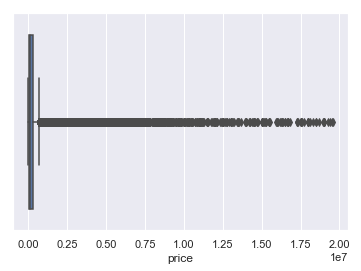

In [21]:
sns.boxplot(data=transactions_df, x='price')

In [22]:
# Filling in nans cause the plotting can't handle NaNs
transactions_df['price'].fillna(value=0, inplace=True)

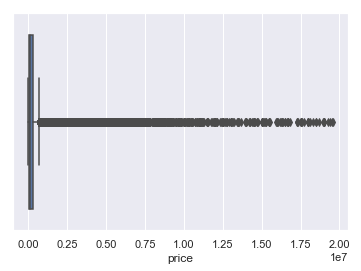

In [23]:
sns.boxplot(data=transactions_df, x='price')

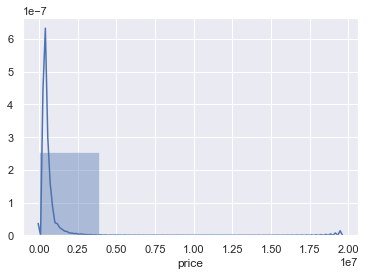

In [24]:
sns.distplot(transactions_df['price'], bins=5)

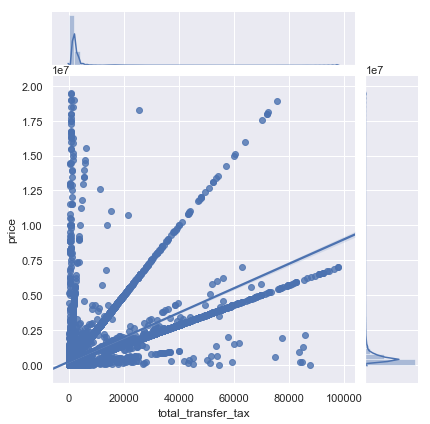

In [25]:
sns.jointplot(data=transactions_df, x='total_transfer_tax', y='price', kind='reg')

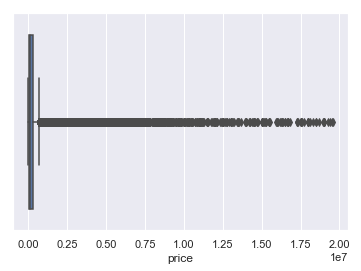

In [26]:
sns.boxplot(data=transactions_df, x='price')

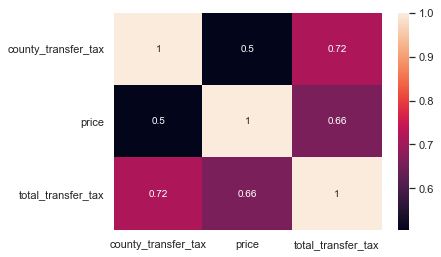

In [27]:
sns.heatmap(data=transactions_df.corr(), annot=True)

### High and medium correlated features from Transactions

* total_transfer_tax vs. county_transfer_tax (0.72)

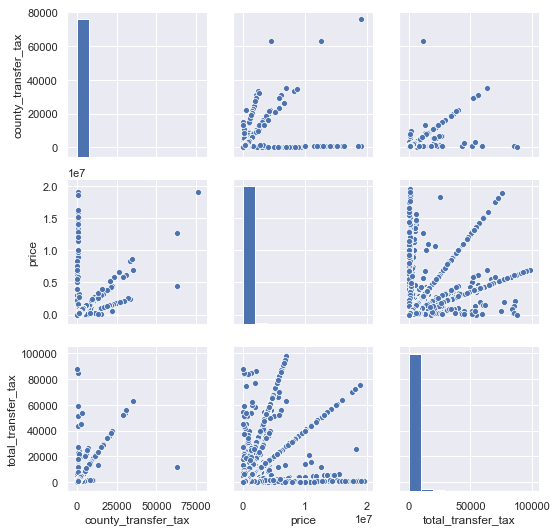

In [28]:
sns.pairplot(transactions_df)

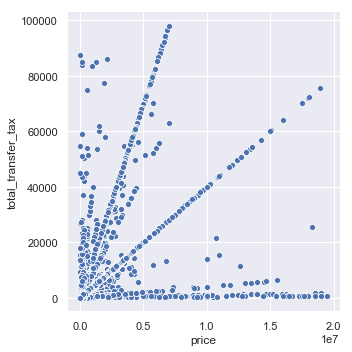

In [29]:
sns.relplot(data=transactions_df, x='price', y='total_transfer_tax')

### Playin around with plot.ly

In [30]:
transactions_df[['price', 'total_transfer_tax']].iplot(kind='box')

In [31]:
transactions_df['price'].iplot(kind='hist', xTitle='price', yTitle='count', title='Price Distribution')

In [ ]:
transactions_matrix_fig = ff.create_scatterplotmatrix(transactions_df[['price', 'total_transfer_tax', \
                                                                       'county_transfer_tax']], diag='histogram')
py.iplot(transactions_matrix_fig)

In [ ]:
transactions_df[transactions_df['price'] == transactions_df['price'].max()]

### Enriching transactions data with properties data

In [ ]:
transactions_en_df = pd.merge(transactions_df, properties_df, how='left', on=['property_url'])
transactions_en_df